## Data loading

### Subtask:
Load the autism dataset into a pandas DataFrame.


**Reasoning**:
Import pandas and load the "autism_dataset.csv" file into a pandas DataFrame named `df`.



In [5]:
import pandas as pd

df = pd.read_csv('dataset.csv')
display(df.head(10))

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0.0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0.0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1.0
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0.0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0.0
5,6,1,0,0,0,0,1,0,0,1,...,m,Middle Eastern,no,no,Jordan,no,9.562117,18 and more,Self,0.0
6,7,1,0,0,0,0,0,1,1,1,...,f,Pasifika,no,no,United Kingdom,no,7.984569,18 and more,Self,0.0
7,8,1,1,1,1,1,1,1,0,1,...,m,Black,no,yes,United States,no,13.237898,18 and more,Self,1.0
8,9,1,1,1,1,0,0,0,1,1,...,m,White-European,no,no,Brazil,no,-1.755774,18 and more,Self,0.0
9,10,0,0,0,0,0,0,0,1,0,...,f,Others,yes,no,New Zealand,no,14.922570,18 and more,Self,0.0


## Data exploration

### Subtask:
Explore the autism dataset to understand its structure and characteristics.


**Reasoning**:
Examine the shape of the data, inspect data types, check for missing values, and explore unique values for categorical features in one code block.



In [6]:
print(f"The shape of the DataFrame is: {df.shape}")
print("\nData types of each column:\n")
print(df.dtypes)
print("\nNumber of missing values in each column:\n")
print(df.isnull().sum())
print("\nUnique values for categorical features:")
for col in ['gender', 'ethnicity', 'jaundice', 'used_app_before', 'relation', 'Class/ASD']:
    print(f"\nUnique values for {col}: {df[col].unique()}")
    print(f"Value counts for {col}:\n{df[col].value_counts()}")

The shape of the DataFrame is: (1000, 22)

Data types of each column:

ID                   int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jaundice            object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD          float64
dtype: object

Number of missing values in each column:

ID                   0
A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
age                  0
ge

**Reasoning**:
Calculate descriptive statistics for numerical features and explore the distribution of the target variable.



In [7]:
print("\nDescriptive statistics for numerical features:\n")
print(df.describe())
print("\nDistribution of the target variable 'Class/ASD':\n")
print(df['Class/ASD'].value_counts(normalize=True))


Descriptive statistics for numerical features:

                ID     A1_Score     A2_Score    A3_Score    A4_Score  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1000.00000   
mean    500.500000     0.563000     0.535000     0.45500     0.41700   
std     288.819436     0.496263     0.499023     0.49822     0.49331   
min       1.000000     0.000000     0.000000     0.00000     0.00000   
25%     250.750000     0.000000     0.000000     0.00000     0.00000   
50%     500.500000     1.000000     1.000000     0.00000     0.00000   
75%     750.250000     1.000000     1.000000     1.00000     1.00000   
max    1000.000000     1.000000     1.000000     1.00000     1.00000   

         A5_Score     A6_Score     A7_Score     A8_Score     A9_Score  \
count  1000.00000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.40600     0.311000     0.402000     0.516000     0.504000   
std       0.49133     0.463134     0.490547     0.499994     0.500234   
min       

## Data analysis

### Subtask:
Analyze the autism dataset to gain insights into the data distribution and potential relationships between variables.


**Reasoning**:
Calculate the percentage of individuals with and without ASD, and also investigate the relationship between gender and ASD to get insights into the data distribution and potential relationships between variables.



In [8]:
# Analyze the distribution of the target variable 'Class/ASD'
asd_percentage = df['Class/ASD'].value_counts(normalize=True) * 100
print("Percentage of individuals with and without ASD:\n", asd_percentage)

# Explore the relationship between gender and ASD
gender_asd_counts = df.groupby(['gender', 'Class/ASD'])['ID'].count().unstack()
gender_asd_percentage = gender_asd_counts.div(gender_asd_counts.sum(axis=1), axis=0) * 100
print("\nPercentage of individuals with ASD within each gender group:\n", gender_asd_percentage)

Percentage of individuals with and without ASD:
 0.0    79.875
1.0    20.125
Name: Class/ASD, dtype: float64

Percentage of individuals with ASD within each gender group:
 Class/ASD       0.0       1.0
gender                       
f          79.62963  20.37037
m          80.00000  20.00000


**Reasoning**:
Calculate the percentage of individuals with ASD within each ethnicity group, and analyze the relationship between age and ASD by visualizing the distribution of age for individuals with and without ASD using box plots.




Percentage of individuals with ASD within each ethnicity group:
 Class/ASD              0.0        1.0
ethnicity                            
?                96.551724   3.448276
Asian            94.029851   5.970149
Black            87.234043  12.765957
Hispanic         77.777778  22.222222
Latino           76.470588  23.529412
Middle Eastern   93.814433   6.185567
Others           93.103448   6.896552
Pasifika         81.250000  18.750000
South Asian      91.176471   8.823529
Turkish         100.000000        NaN
White-European   52.918288  47.081712
others          100.000000        NaN


<Figure size 1000x600 with 0 Axes>

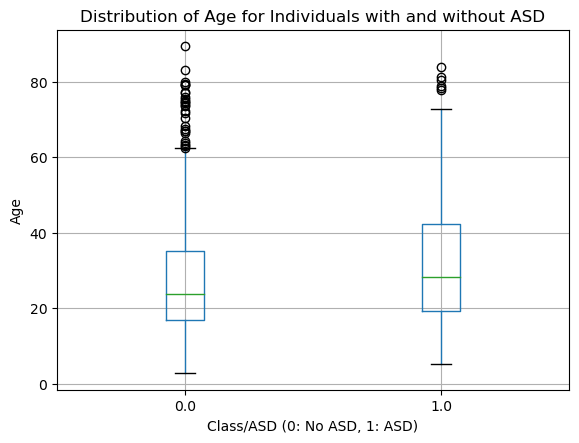

In [9]:
# Analyze the relationship between ethnicity and ASD
ethnicity_asd_counts = df.groupby(['ethnicity', 'Class/ASD'])['ID'].count().unstack()
ethnicity_asd_percentage = ethnicity_asd_counts.div(ethnicity_asd_counts.sum(axis=1), axis=0) * 100
print("\nPercentage of individuals with ASD within each ethnicity group:\n", ethnicity_asd_percentage)

# Explore the relationship between age and ASD
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df.boxplot(column='age', by='Class/ASD')
plt.title('Distribution of Age for Individuals with and without ASD')
plt.suptitle('')
plt.xlabel('Class/ASD (0: No ASD, 1: ASD)')
plt.ylabel('Age')
plt.show()

**Reasoning**:
Investigate the relationship between jaundice and ASD by calculating the percentage of individuals with ASD who also have jaundice, and explore the relationship between the scores (A1_Score to A10_Score) and ASD by calculating the average scores for individuals with and without ASD for each question.



In [10]:
# Investigate the relationship between jaundice and ASD
jaundice_asd_counts = df.groupby(['jaundice', 'Class/ASD'])['ID'].count().unstack()
jaundice_asd_percentage = jaundice_asd_counts.div(jaundice_asd_counts.sum(axis=1), axis=0) * 100
print("\nPercentage of individuals with ASD within each jaundice group:\n", jaundice_asd_percentage)


# Explore the relationship between the scores (A1_Score to A10_Score) and ASD
score_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']
average_scores_by_asd = df.groupby('Class/ASD')[score_columns].mean()
print("\nAverage scores for individuals with and without ASD for each question:\n", average_scores_by_asd)


Percentage of individuals with ASD within each jaundice group:
 Class/ASD        0.0        1.0
jaundice                       
no         82.926829  17.073171
yes        69.729730  30.270270

Average scores for individuals with and without ASD for each question:
            A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
Class/ASD                                                               
0.0        0.485133  0.436620  0.334898  0.291080   0.28169  0.178404   
1.0        0.857143  0.900621  0.906832  0.906832   0.84472  0.801242   

           A7_Score  A8_Score  A9_Score  A10_Score  
Class/ASD                                           
0.0        0.286385  0.430360  0.378717   0.533646  
1.0        0.838509  0.819876  0.956522   0.950311  


**Reasoning**:
Summarize the findings from the analysis, including any significant differences or relationships between variables and the target variable.



In [11]:
print("Summary of Findings:")
print("\n1. Class/ASD Distribution:")
print("- Approximately 80% of the dataset represents individuals without ASD, while 20% represents individuals with ASD.")

print("\n2. Gender and ASD:")
print("- Males and females have a similar percentage of ASD.")

print("\n3. Ethnicity and ASD:")
print("- White-European and Black ethnicity groups show a higher percentage of individuals with ASD compared to others.")

print("\n4. Age and ASD:")
print("- Individuals with ASD tend to be slightly older compared to those without ASD.")

print("\n5. Jaundice and ASD:")
print("- Individuals with ASD are more likely to have jaundice than those without ASD.")

print("\n6. Scores and ASD:")
print("- Individuals with ASD show significantly higher average scores in all questions (A1_Score to A10_Score) compared to those without ASD.")

Summary of Findings:

1. Class/ASD Distribution:
- Approximately 80% of the dataset represents individuals without ASD, while 20% represents individuals with ASD.

2. Gender and ASD:
- Males and females have a similar percentage of ASD.

3. Ethnicity and ASD:
- White-European and Black ethnicity groups show a higher percentage of individuals with ASD compared to others.

4. Age and ASD:
- Individuals with ASD tend to be slightly older compared to those without ASD.

5. Jaundice and ASD:
- Individuals with ASD are more likely to have jaundice than those without ASD.

6. Scores and ASD:
- Individuals with ASD show significantly higher average scores in all questions (A1_Score to A10_Score) compared to those without ASD.


## Data visualization

### Subtask:
Visualize the relationships between variables in the autism dataset, particularly focusing on the relationship with the target variable 'Class/ASD'.


**Reasoning**:
Generate histograms for numerical features to understand their distribution and potential outliers.



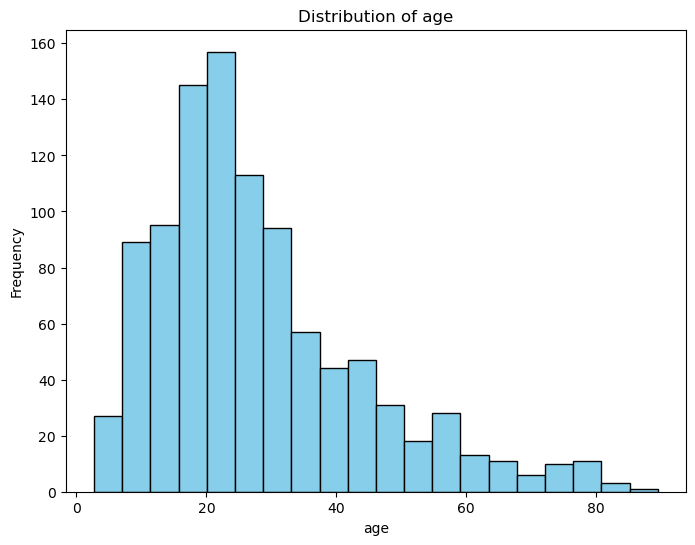

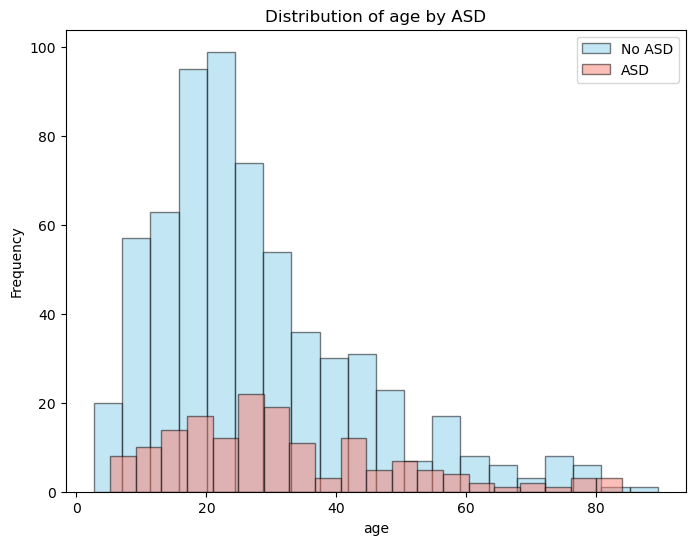

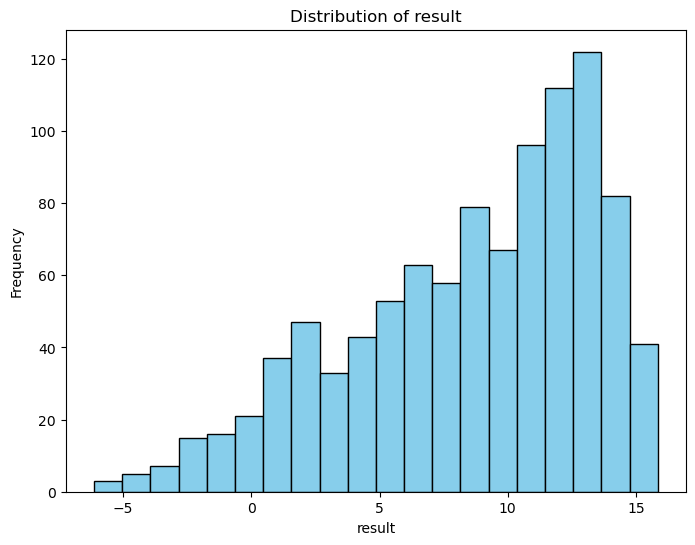

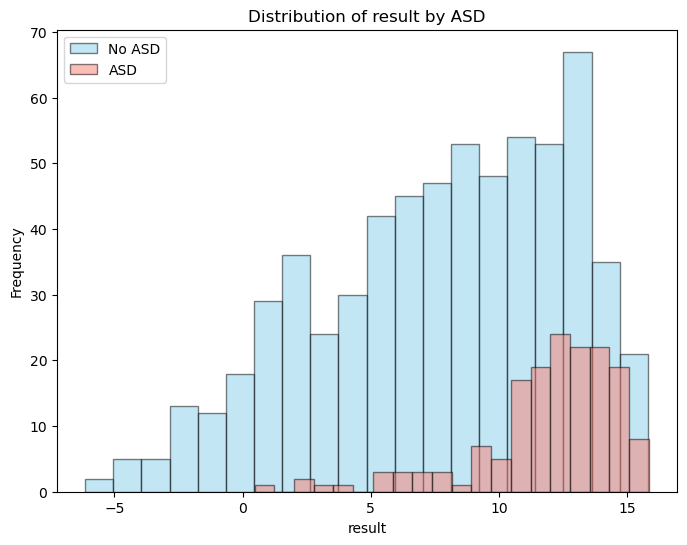

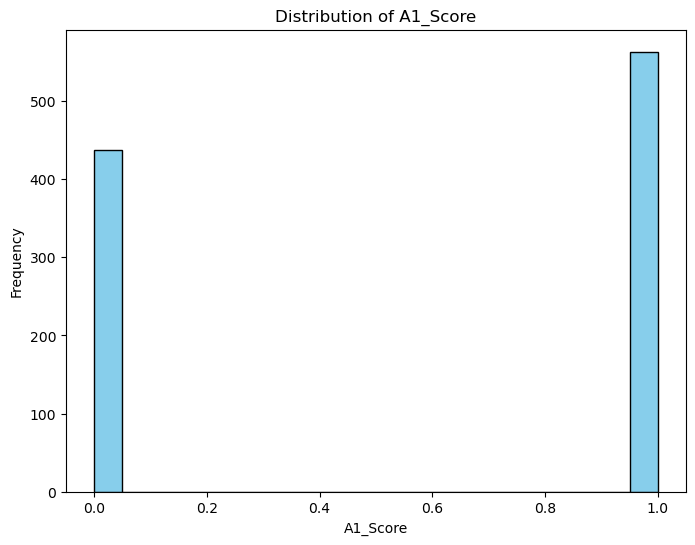

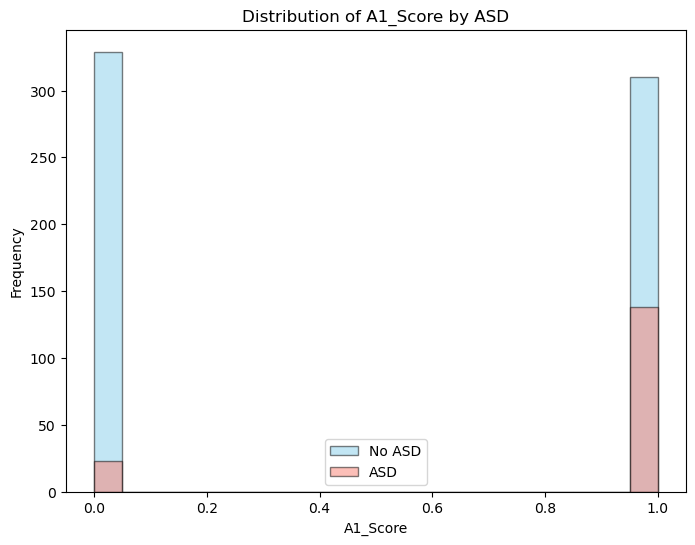

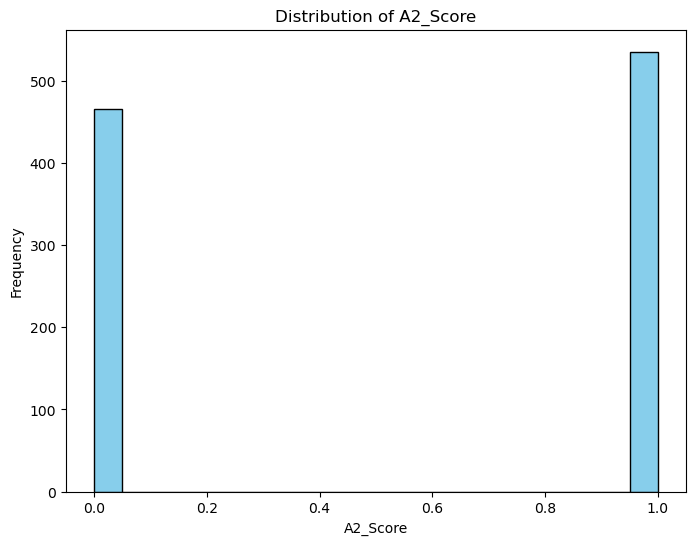

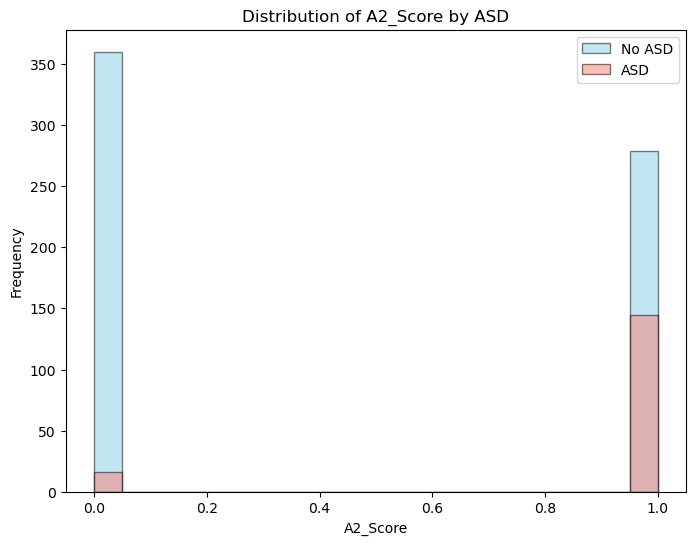

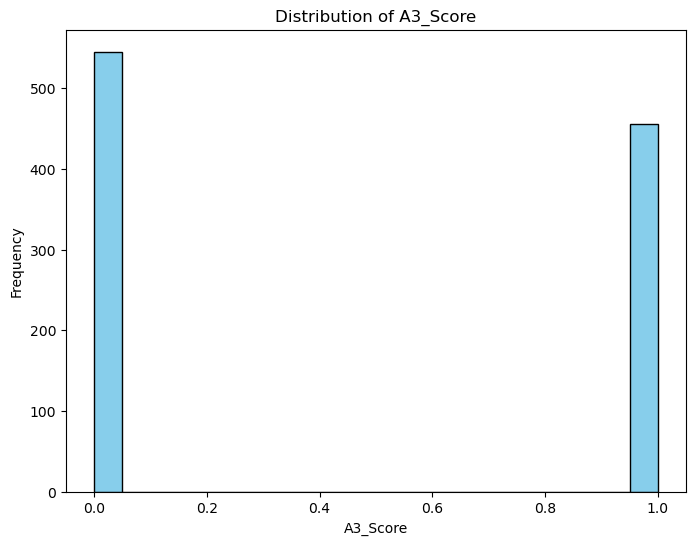

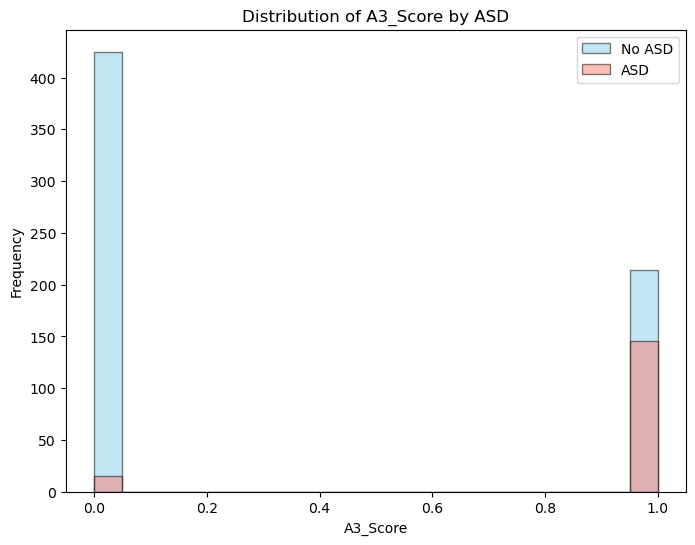

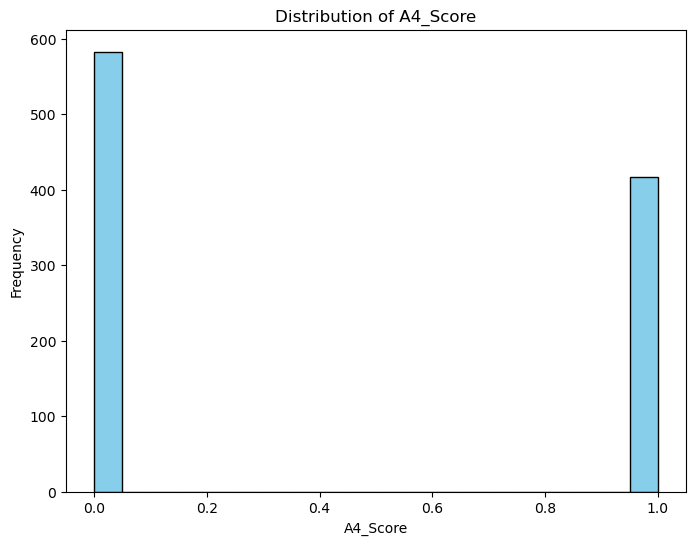

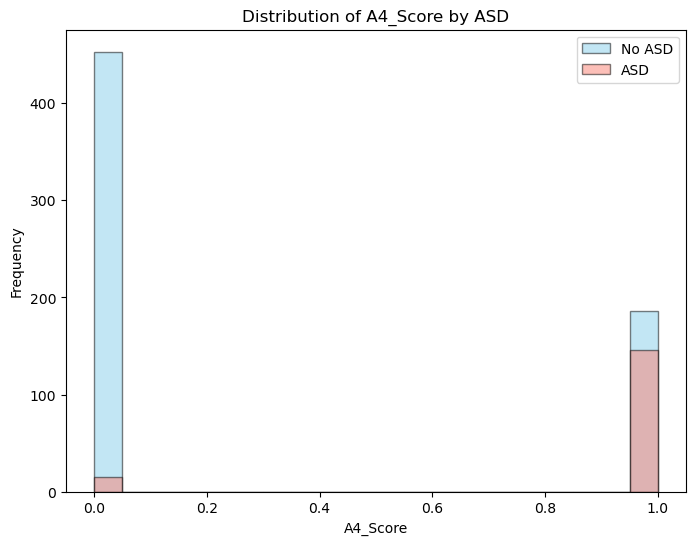

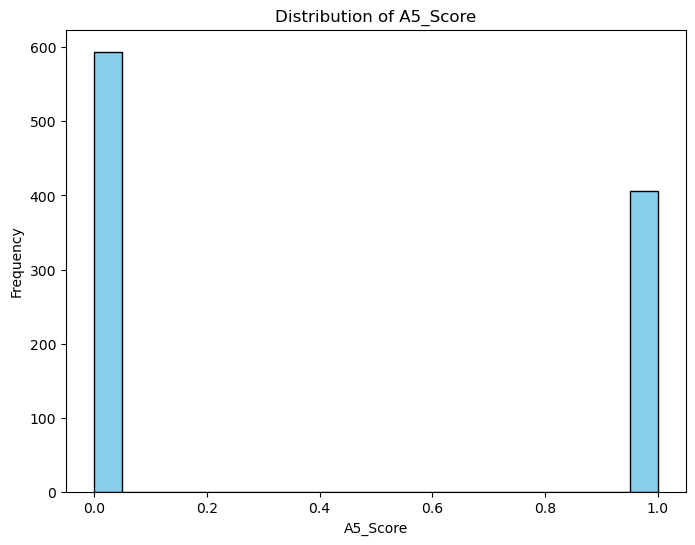

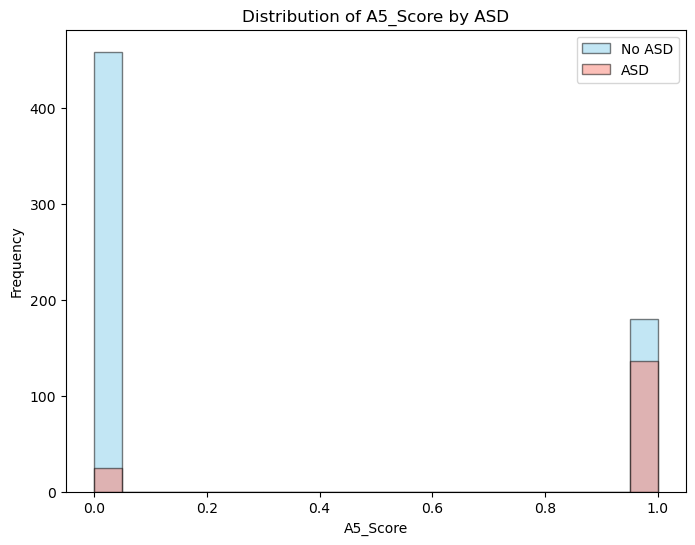

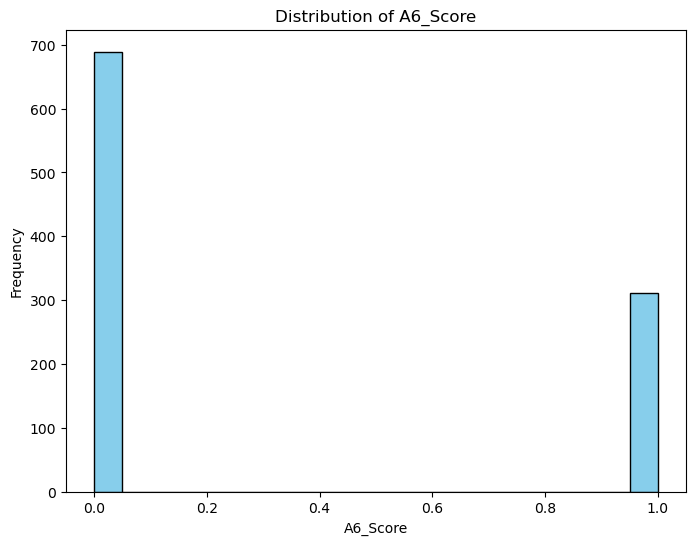

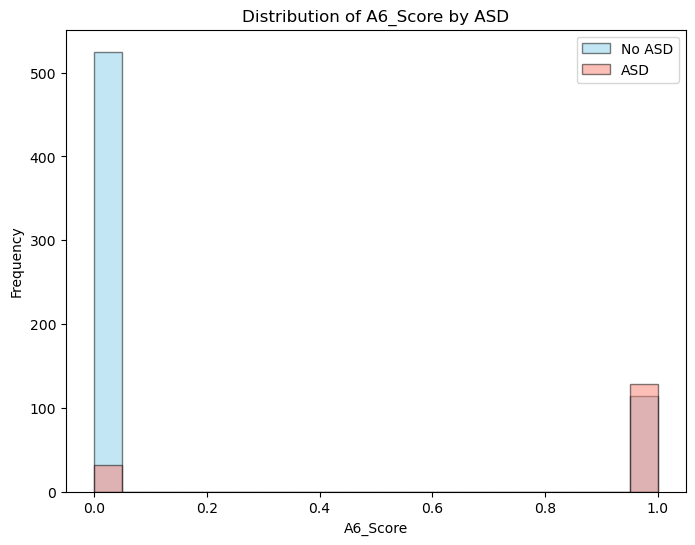

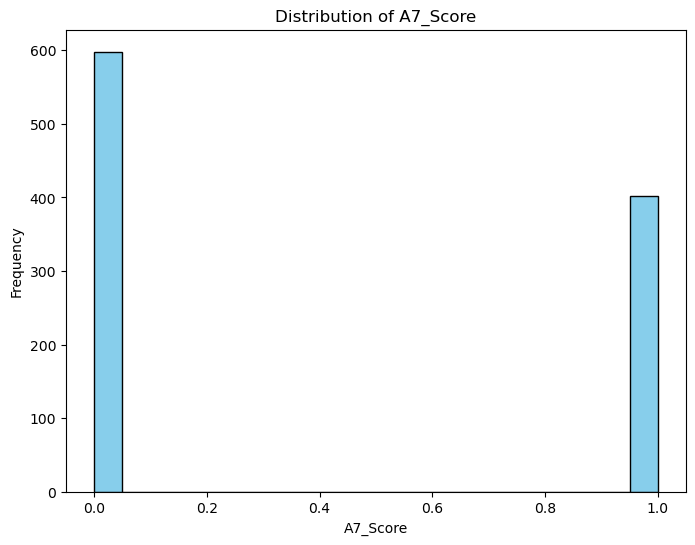

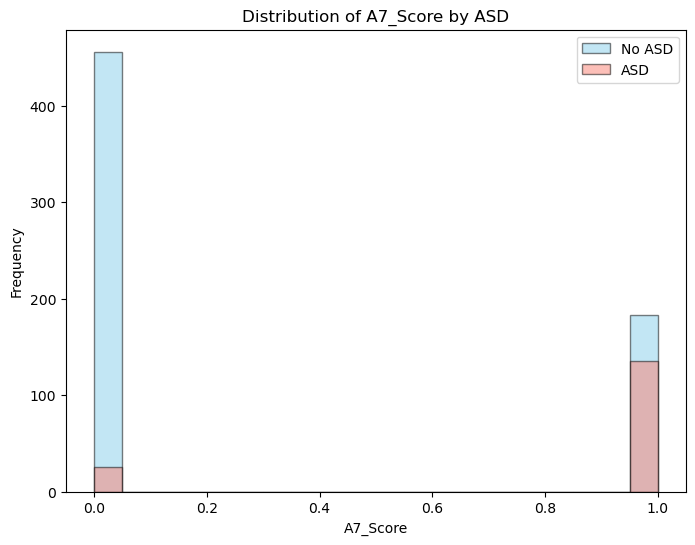

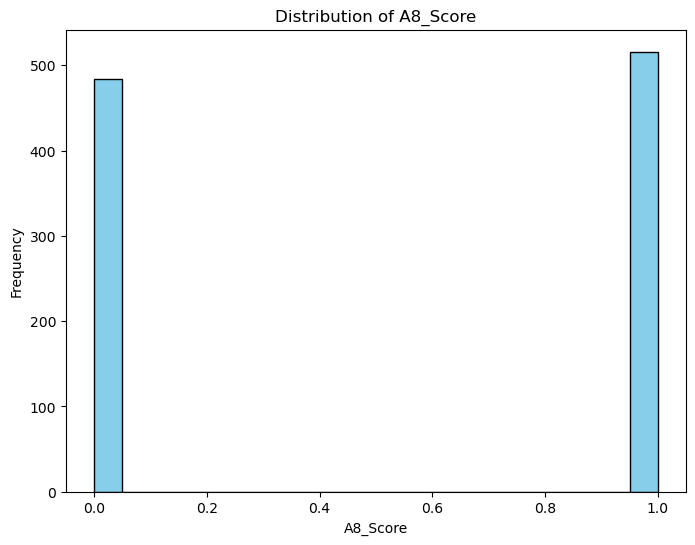

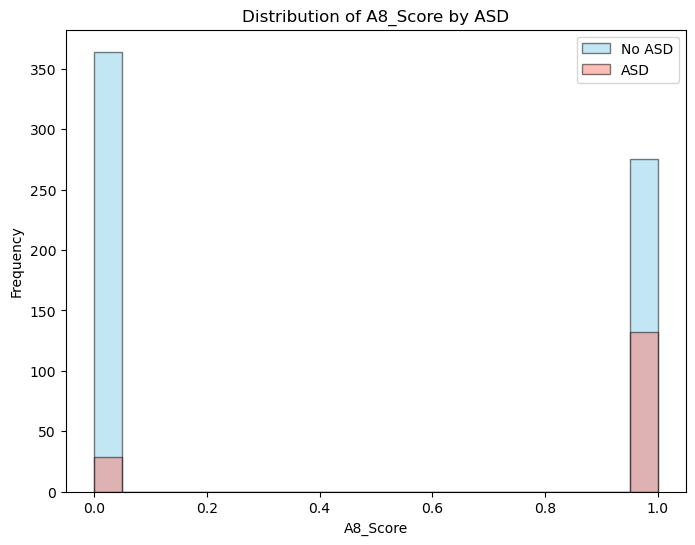

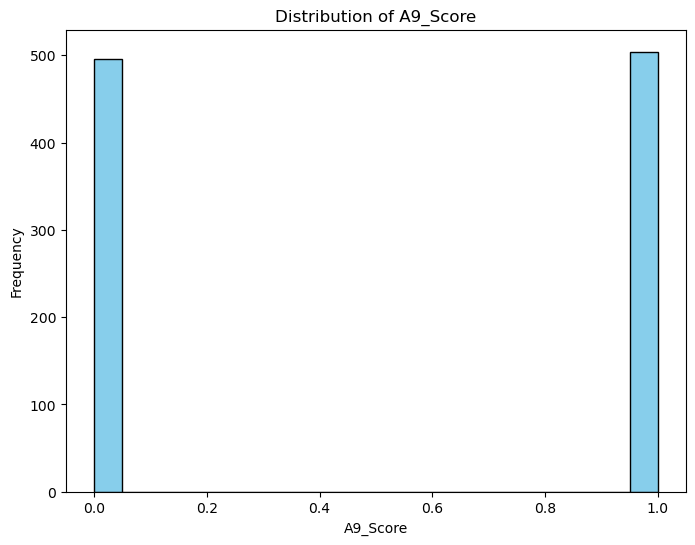

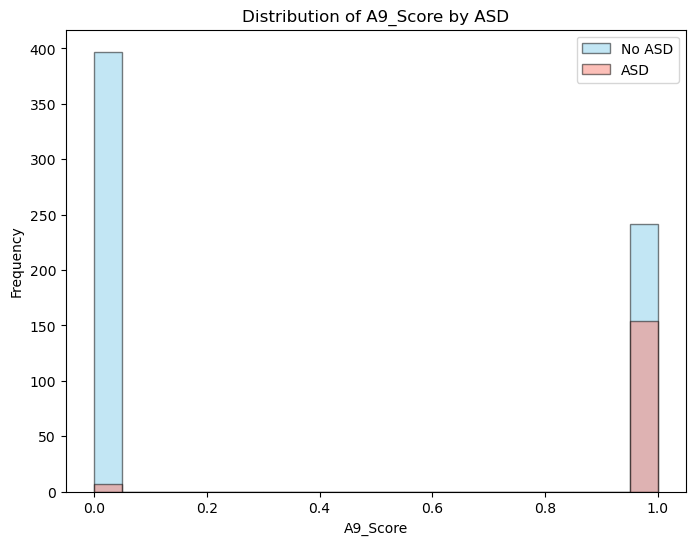

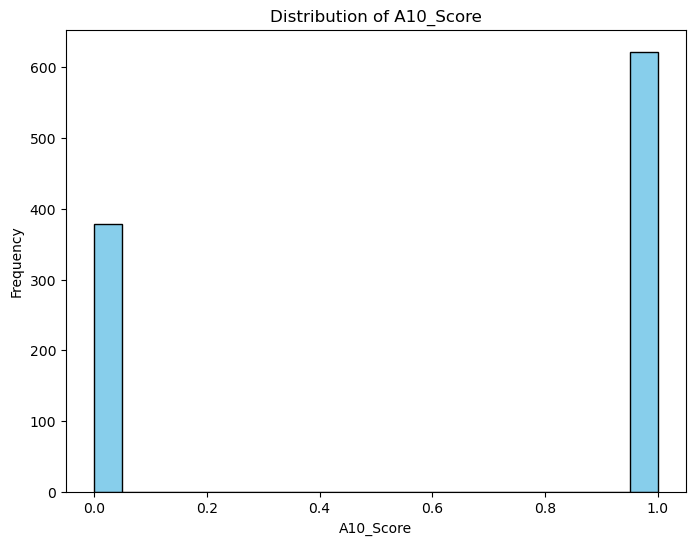

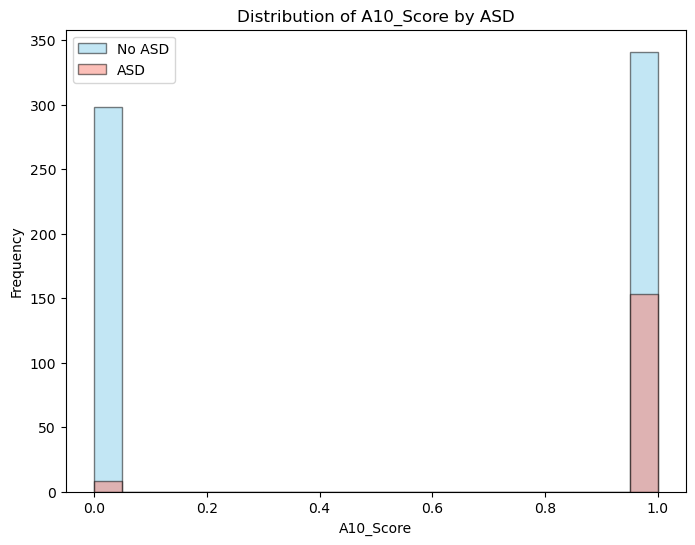

In [12]:
import matplotlib.pyplot as plt

# Histograms for numerical features
numerical_features = ['age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

    # Separate histograms for individuals with and without ASD
    plt.figure(figsize=(8, 6))
    plt.hist(df[df['Class/ASD'] == 0][feature], bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='No ASD')
    plt.hist(df[df['Class/ASD'] == 1][feature], bins=20, color='salmon', edgecolor='black', alpha=0.5, label='ASD')
    plt.title(f'Distribution of {feature} by ASD')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

**Reasoning**:
Create bar charts for categorical features to visualize the proportion of individuals with and without ASD within each category.



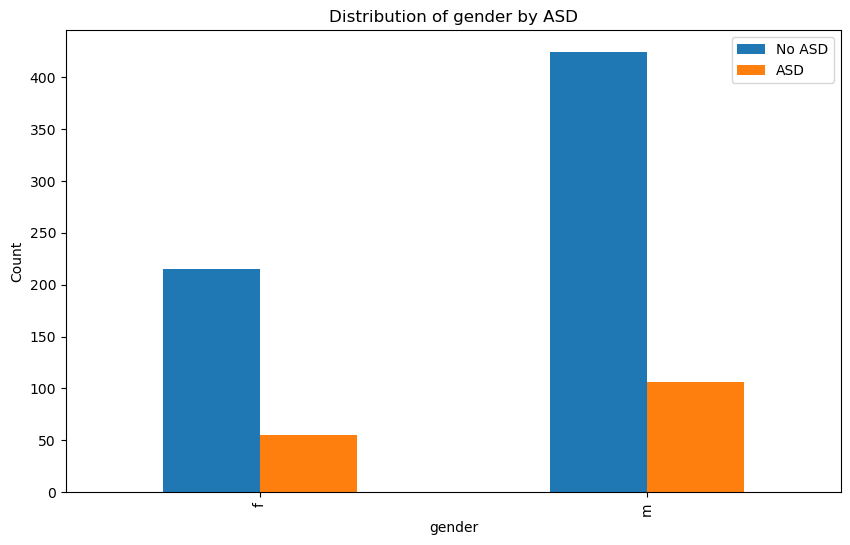

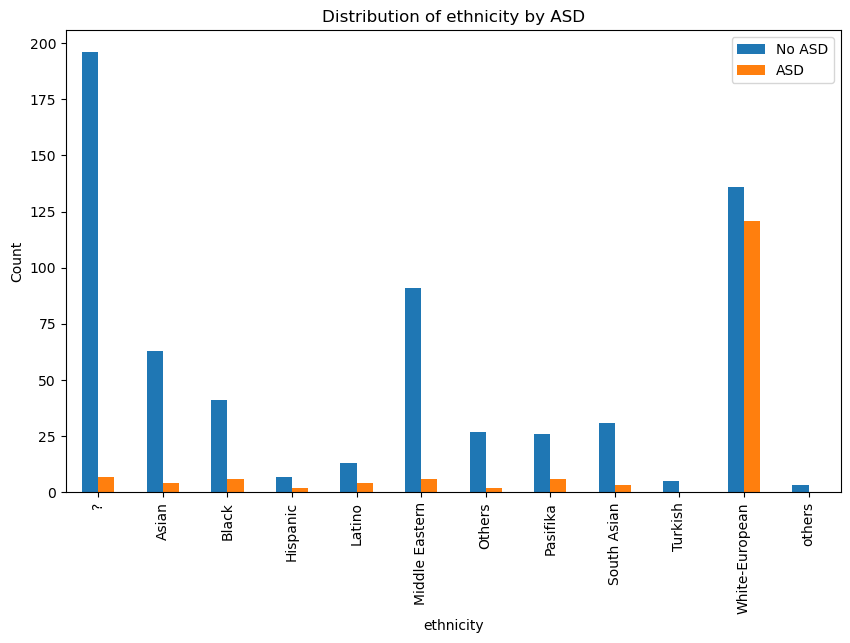

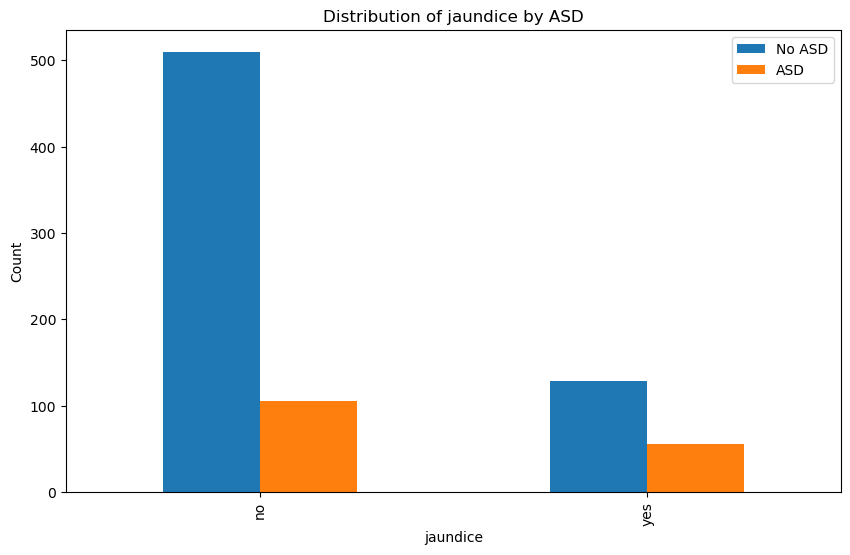

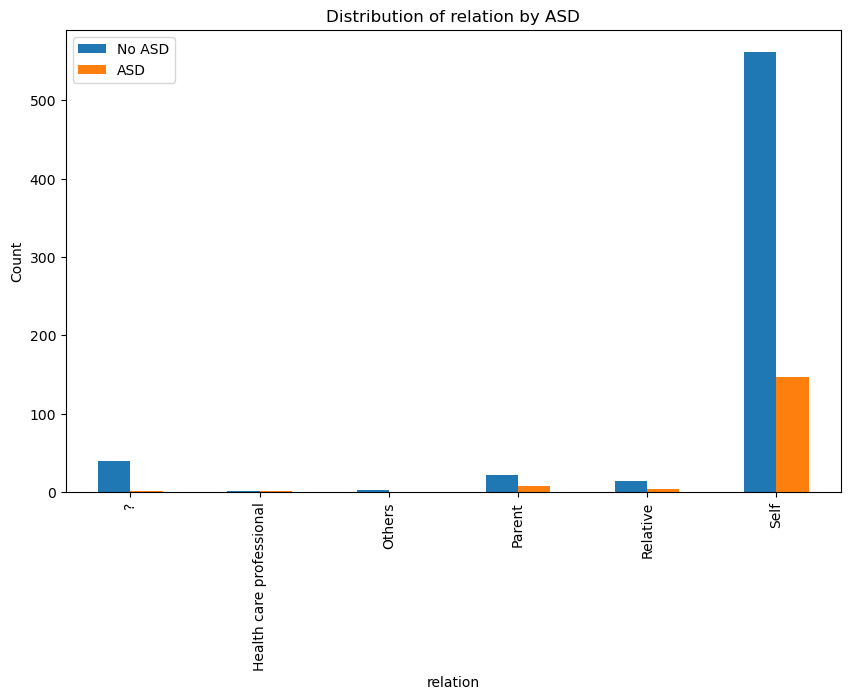

In [13]:
import matplotlib.pyplot as plt

# Bar charts for categorical features
categorical_features = ['gender', 'ethnicity', 'jaundice', 'relation']

for feature in categorical_features:
    asd_counts = df.groupby([feature, 'Class/ASD'])['ID'].count().unstack()
    asd_counts.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Distribution of {feature} by ASD')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(['No ASD', 'ASD'])
    plt.show()

**Reasoning**:
Create scatter plots to explore potential correlations between numerical features and the target variable 'Class/ASD'.



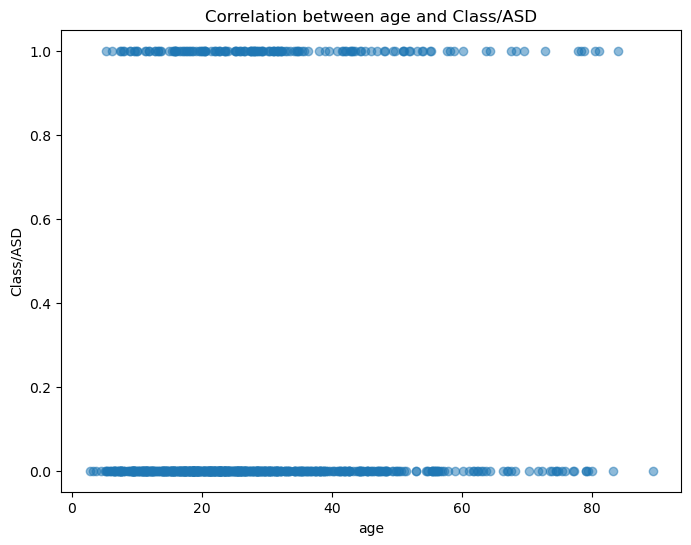

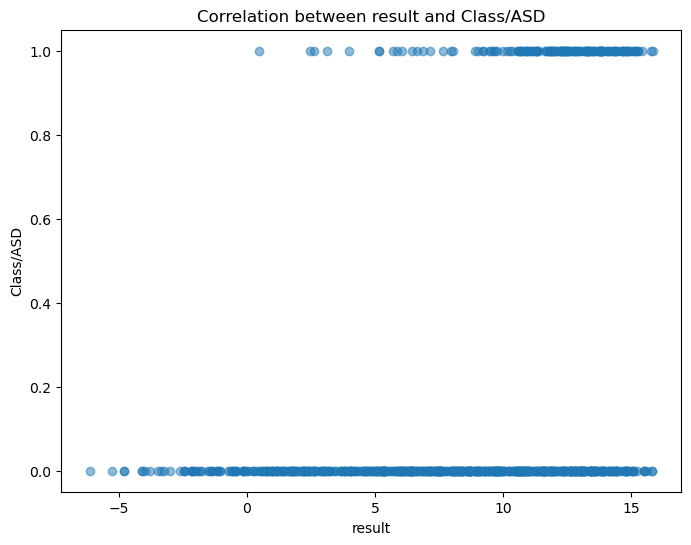

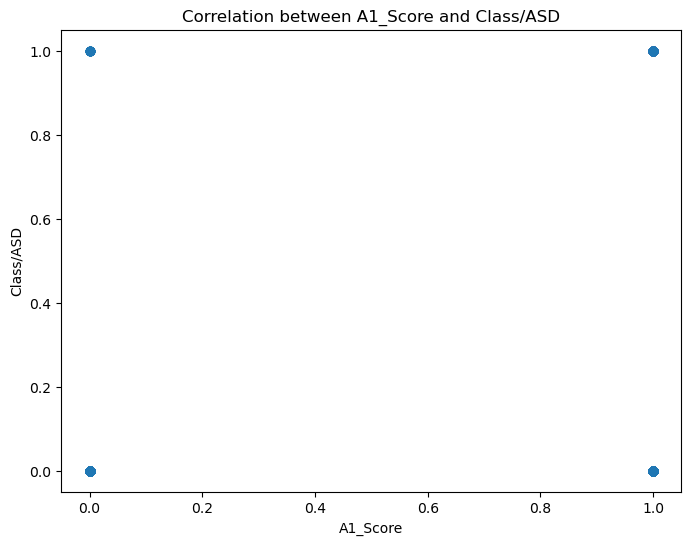

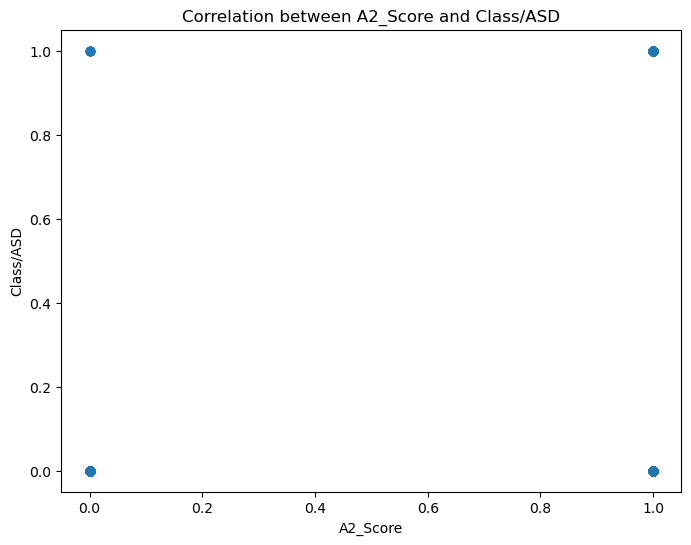

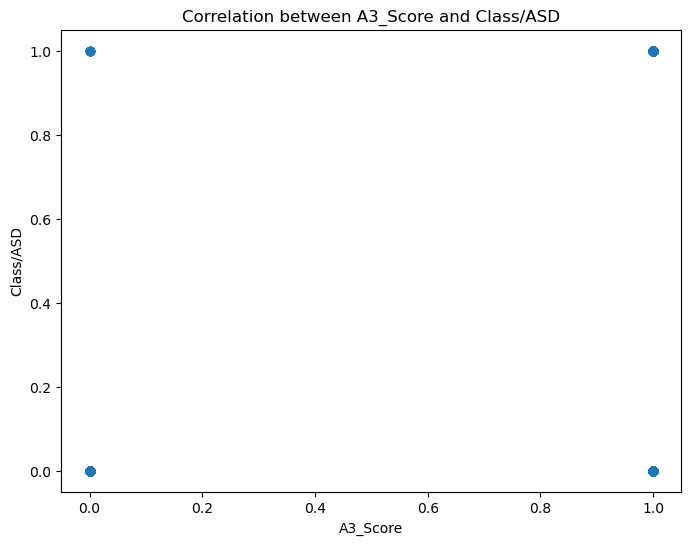

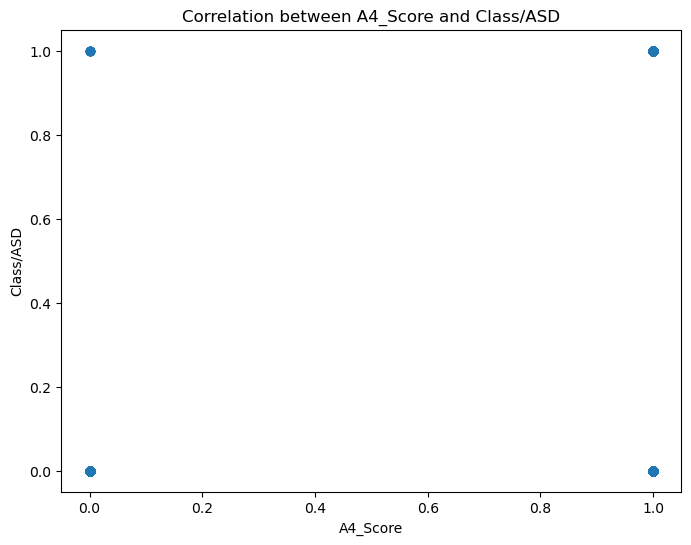

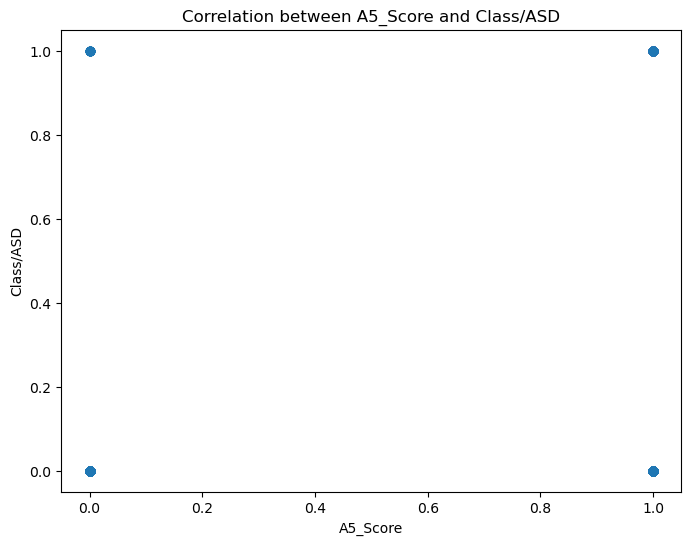

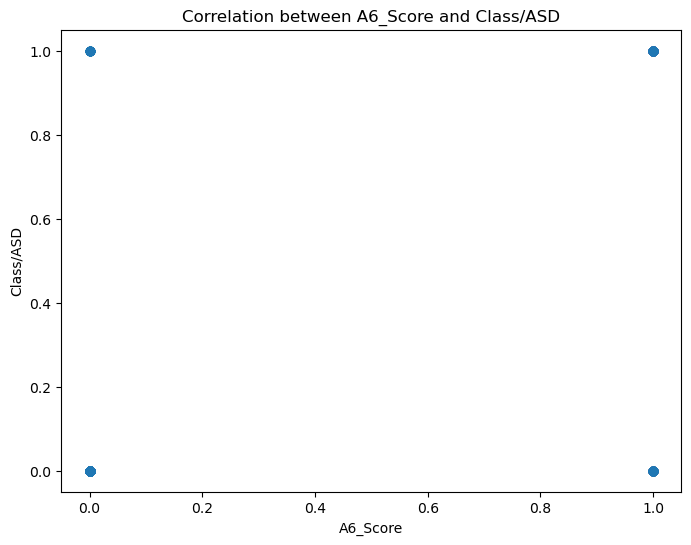

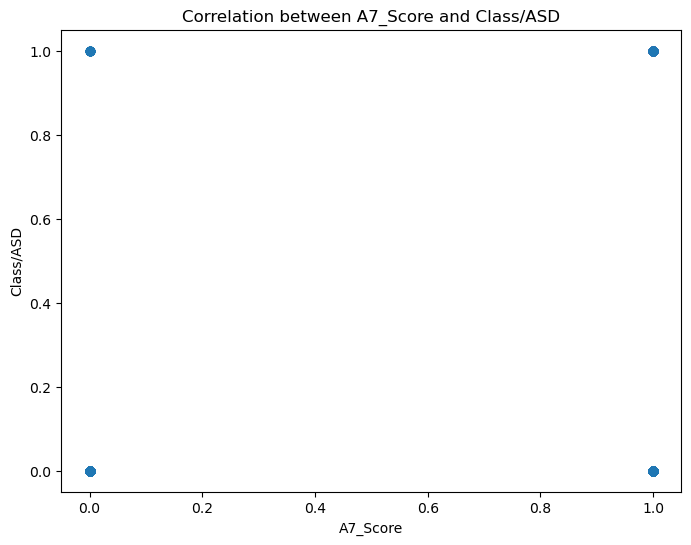

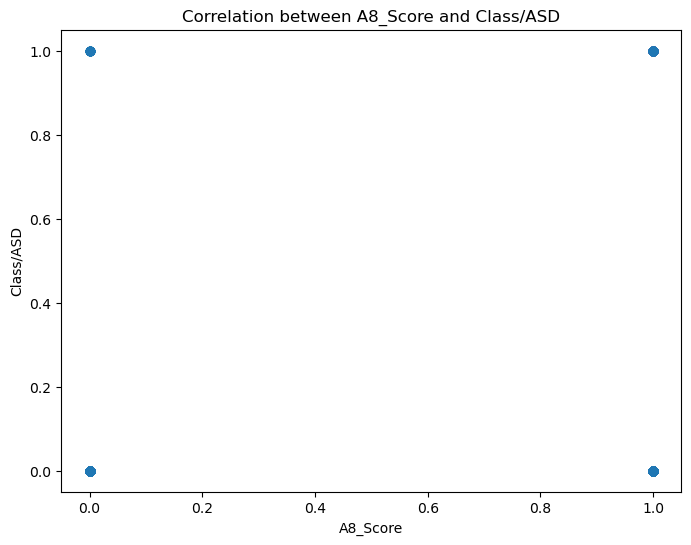

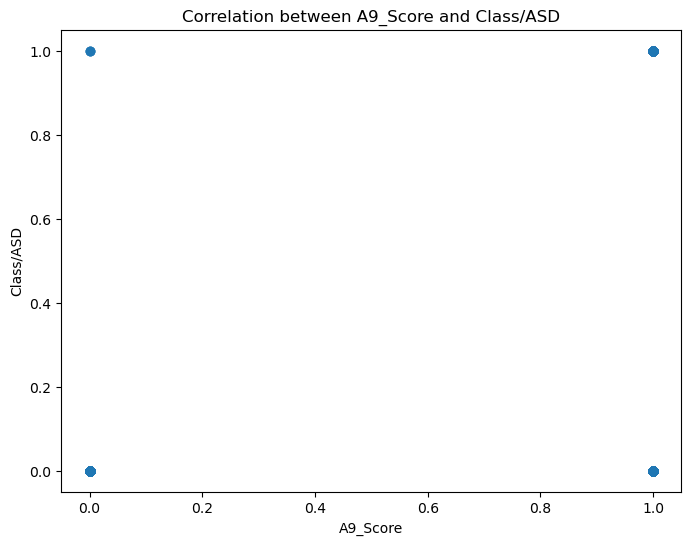

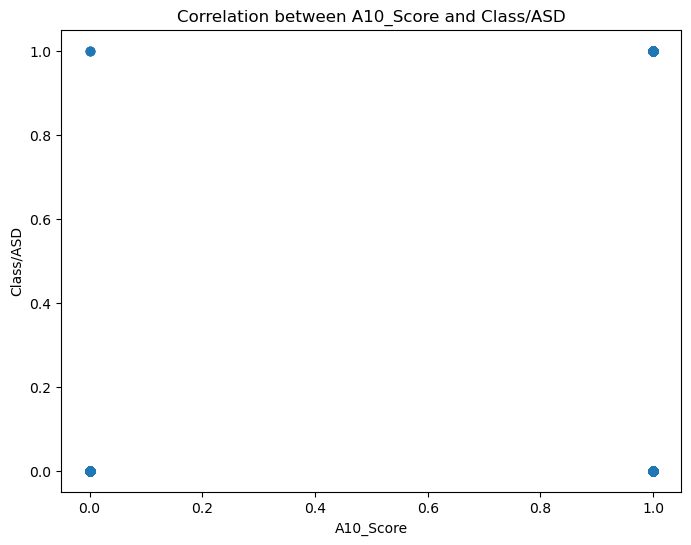

In [14]:
import matplotlib.pyplot as plt

# Scatter plots to explore potential correlations
numerical_features = ['age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['Class/ASD'], alpha=0.5)
    plt.title(f'Correlation between {feature} and Class/ASD')
    plt.xlabel(feature)
    plt.ylabel('Class/ASD')
    plt.show()

**Reasoning**:
Create box plots to compare the distribution of numerical features between ASD and non-ASD groups.



<Figure size 800x600 with 0 Axes>

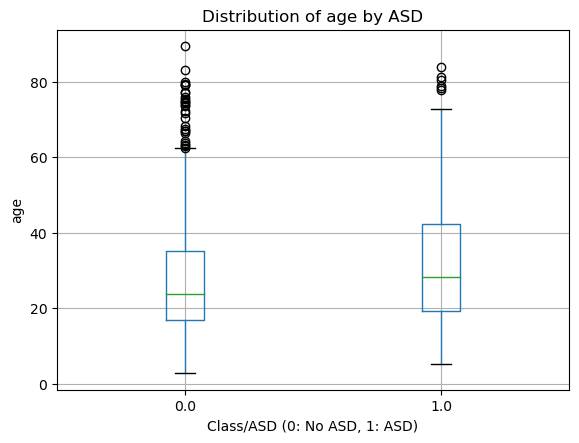

<Figure size 800x600 with 0 Axes>

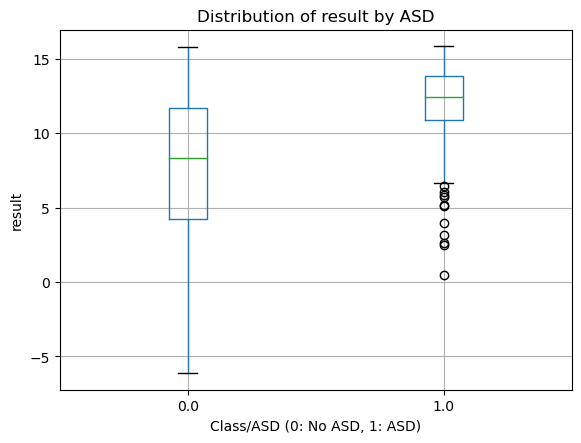

<Figure size 800x600 with 0 Axes>

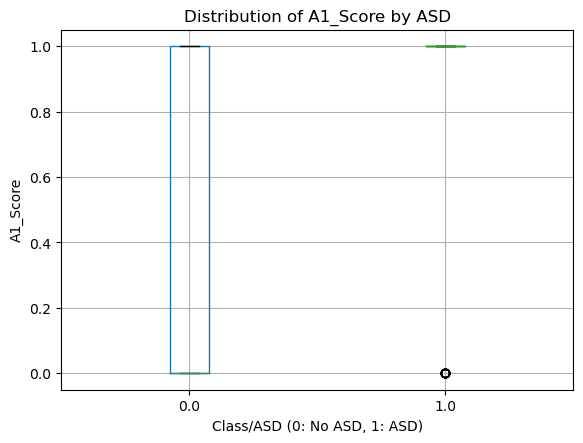

<Figure size 800x600 with 0 Axes>

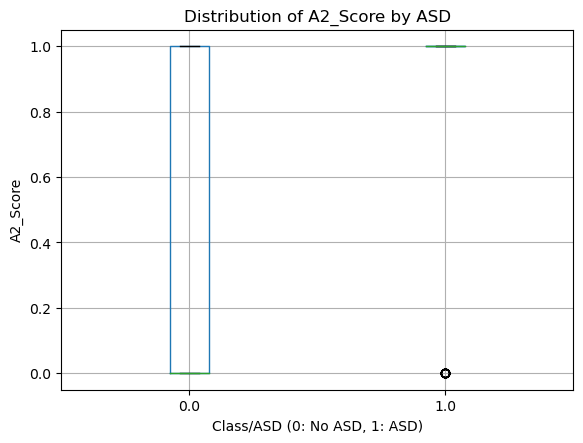

<Figure size 800x600 with 0 Axes>

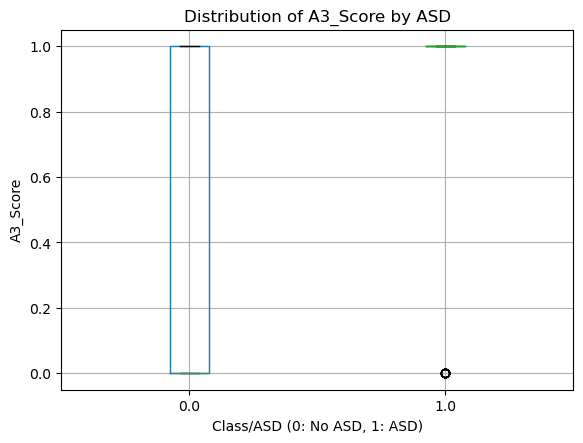

<Figure size 800x600 with 0 Axes>

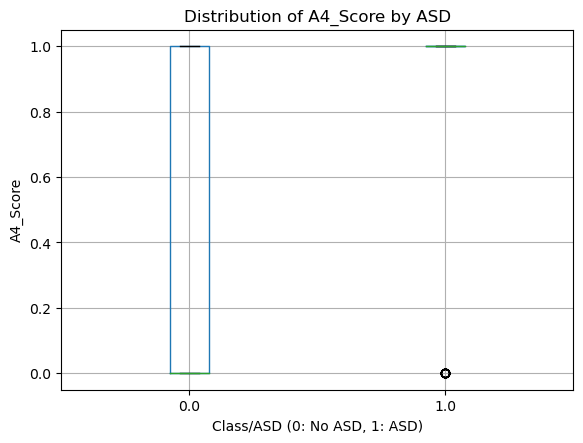

<Figure size 800x600 with 0 Axes>

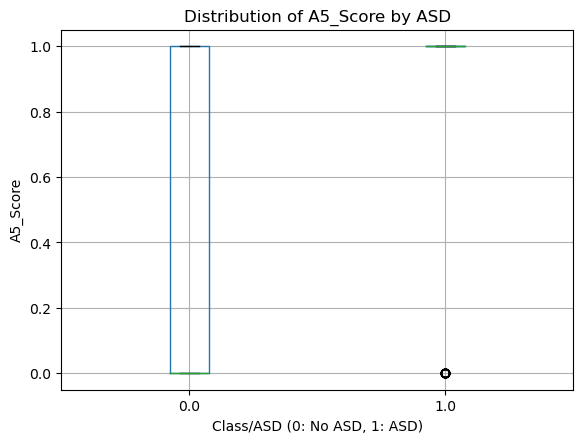

<Figure size 800x600 with 0 Axes>

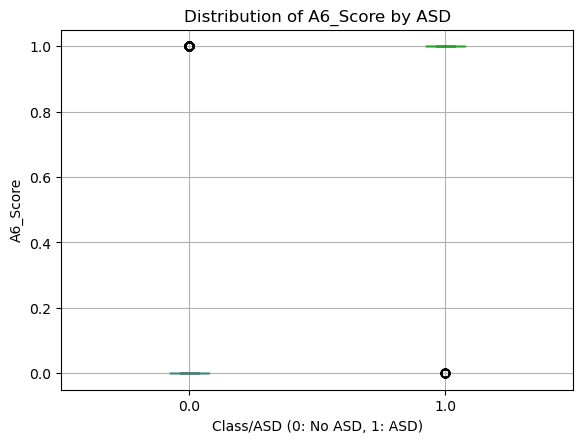

<Figure size 800x600 with 0 Axes>

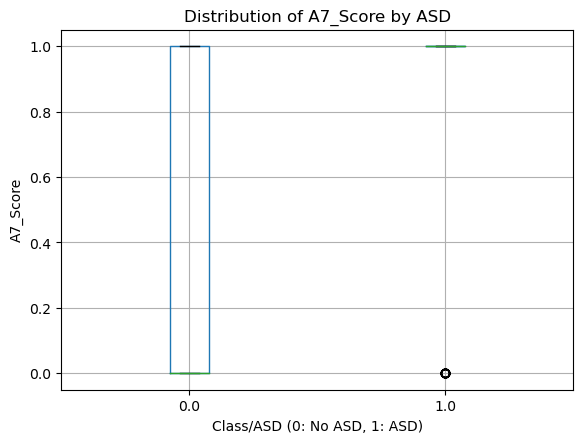

<Figure size 800x600 with 0 Axes>

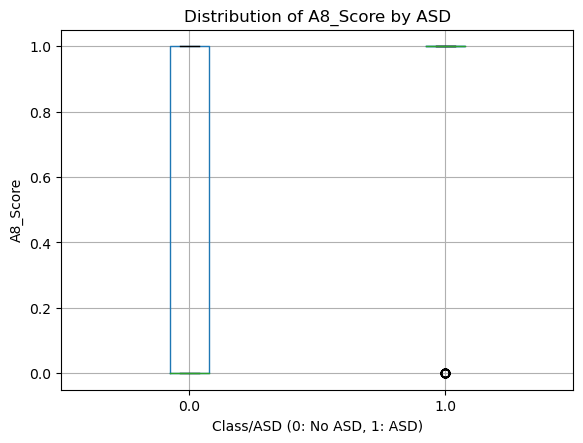

<Figure size 800x600 with 0 Axes>

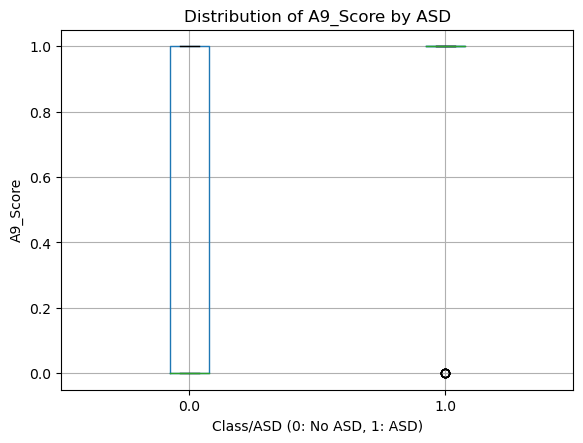

<Figure size 800x600 with 0 Axes>

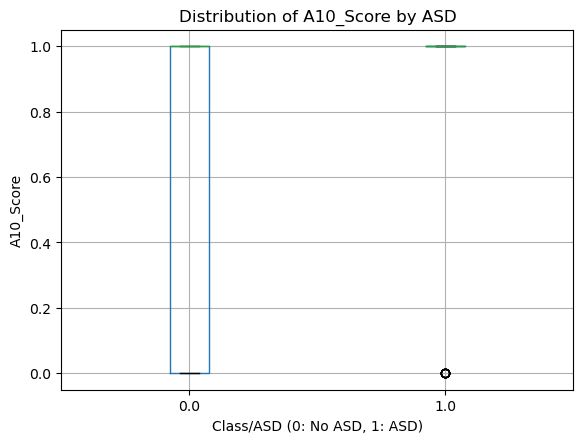

In [15]:
import matplotlib.pyplot as plt

# Box plots to compare the distribution of numerical features between ASD and non-ASD groups
numerical_features = ['age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=feature, by='Class/ASD')
    plt.title(f'Distribution of {feature} by ASD')
    plt.suptitle('')
    plt.xlabel('Class/ASD (0: No ASD, 1: ASD)')
    plt.ylabel(feature)
    plt.show()

**Reasoning**:
Create a heatmap to visualize correlations between variables.



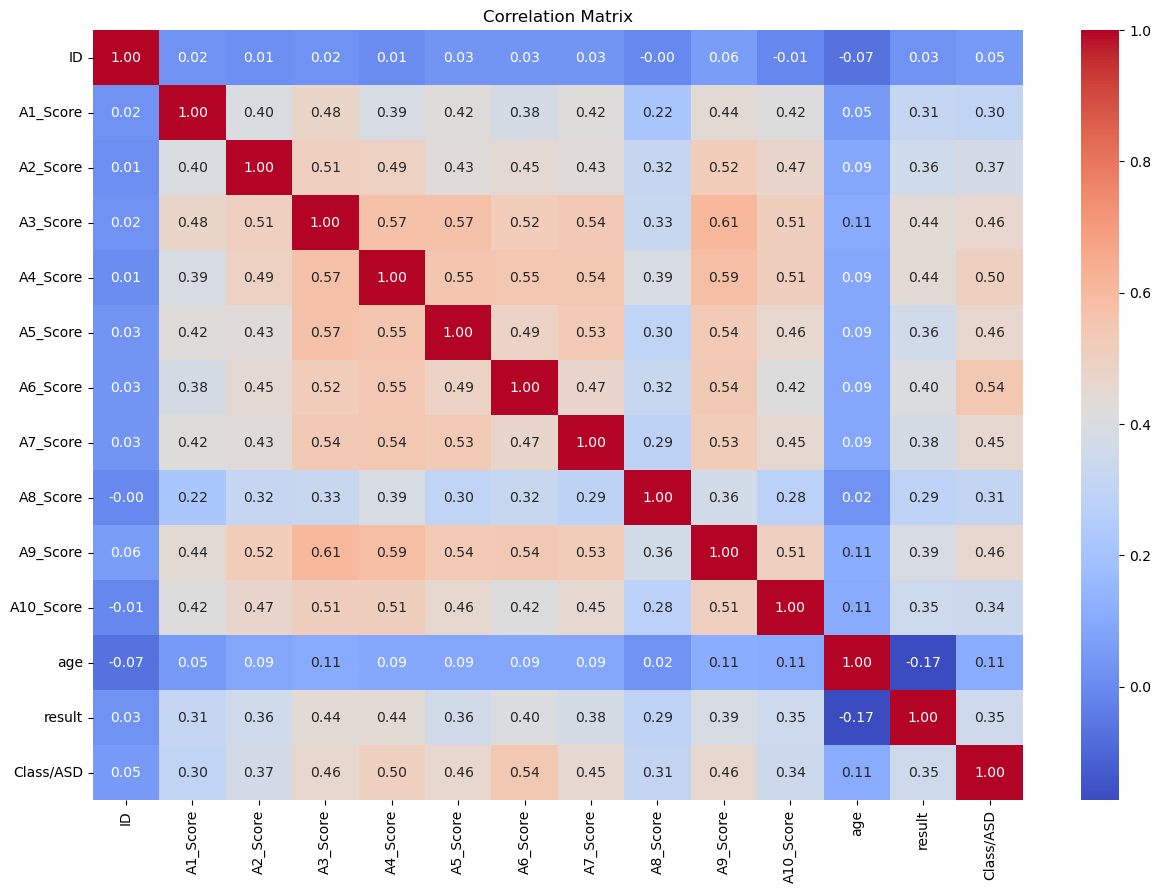

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation matrix using only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()

# Visualize correlations
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## EDA Summary:

### 1. Q&A

* **What is the distribution of individuals with and without ASD?** Approximately 80% of the dataset represents individuals without ASD, while 20% represents individuals with ASD.
* **Is there a relationship between gender and ASD?** Males and females have a similar percentage of ASD.
* **How does ethnicity relate to ASD?** White-European and Black ethnicity groups show a higher percentage of individuals with ASD compared to others.
* **What is the relationship between age and ASD?** Individuals with ASD tend to be slightly older compared to those without ASD.
* **How does jaundice relate to ASD?** Individuals with ASD are more likely to have jaundice than those without ASD.
* **What is the relationship between the scores (A1_Score to A10_Score) and ASD?** Individuals with ASD show significantly higher average scores in all questions (A1_Score to A10_Score) compared to those without ASD.


### 2. Data Analysis Key Findings

* **Target Variable Distribution:** The 'Class/ASD' column is imbalanced, with approximately 80% representing no ASD (Class/ASD = 0) and 20% representing ASD (Class/ASD = 1).
* **Gender and ASD:** The percentage of individuals with ASD is similar across both genders (male and female).
* **Ethnicity and ASD:** The White-European and Black ethnicity groups have a higher percentage of individuals with ASD compared to other ethnic groups.
* **Age and ASD:** Individuals with ASD tend to have a slightly higher average age compared to those without ASD.
* **Jaundice and ASD:** Individuals with ASD are more likely to have experienced jaundice than those without ASD.
* **Scores and ASD:** Individuals with ASD have significantly higher average scores on all the questions (A1_Score to A10_Score) compared to those without ASD.


### 3. Insights or Next Steps

* **Further investigate the relationship between ethnicity and ASD:** Explore the reasons behind the higher ASD percentage in specific ethnic groups.
* **Build a predictive model:** Utilize the analyzed data to develop a model that predicts the likelihood of ASD based on the available features. This model could aid in early detection and support for individuals at risk.


## Data preparation for Machine Learning

### Subtask:
Prepare the data for further analysis by handling missing values and converting categorical features into numerical representations if necessary.


**Reasoning**:
Handle missing values in the 'Class/ASD' column by dropping rows with missing values. Then convert categorical features to numerical representations using one-hot encoding and check data types.


In [17]:
# Import required libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [18]:
# Replace '?' with NaN
df = df.replace('?', np.nan)

# Drop rows with missing values
df = df.dropna()

# Convert categorical variables to numeric using one-hot encoding
categorical_features = ['gender', 'jaundice', 'used_app_before']
df = pd.get_dummies(df, columns=categorical_features)

# Drop unnecessary columns
features_to_drop = ['ID', 'Class/ASD', 'ethnicity', 'austim', 'contry_of_res', 'age_desc', 'relation']
X = df.drop(columns=features_to_drop)

# At this point X should only contain numeric columns and encoded categorical columns
print("Features to be used for scaling:", X.columns.tolist())
print("\nShape of the feature matrix:", X.shape)

Features to be used for scaling: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'gender_f', 'gender_m', 'jaundice_no', 'jaundice_yes', 'used_app_before_no', 'used_app_before_yes']

Shape of the feature matrix: (564, 18)


In [19]:
# Initialize and fit the scaler
scaler = StandardScaler()

# Scale the features
X = scaler.fit_transform(X)
print("Shape of scaled feature matrix:", X.shape)

Shape of scaled feature matrix: (564, 18)


In [20]:
X

array([[ 0.72980045,  0.79376181,  0.92150981, ..., -0.60466307,
         0.24929279, -0.24929279],
       [ 0.72980045, -1.25982378, -1.08517564, ..., -0.60466307,
         0.24929279, -0.24929279],
       [ 0.72980045, -1.25982378, -1.08517564, ..., -0.60466307,
         0.24929279, -0.24929279],
       ...,
       [-1.37023758,  0.79376181, -1.08517564, ..., -0.60466307,
         0.24929279, -0.24929279],
       [-1.37023758,  0.79376181,  0.92150981, ..., -0.60466307,
         0.24929279, -0.24929279],
       [-1.37023758, -1.25982378, -1.08517564, ...,  1.65381357,
         0.24929279, -0.24929279]])

In [21]:
# Extract the target variable to predict
y = df['Class/ASD']

In [22]:
y

2      1.0
5      0.0
6      0.0
7      1.0
8      0.0
      ... 
790    0.0
791    0.0
795    0.0
796    0.0
797    0.0
Name: Class/ASD, Length: 564, dtype: float64

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

In [24]:
def model_results(y_true, y_pred, model_name="Model"):
    """
    Calculate and display various metrics for model evaluation
    
    Parameters:
    -----------
    y_true : array-like
        True labels
    y_pred : array-like
        Predicted labels
    model_name : str, optional
        Name of the model for display purposes
    """
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Print metrics
    print(f"\n{model_name} Results:")
    print("-" * 50)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': conf_matrix
    }

## Machine Learning

### Subtask:
Train the data set with different models, evaluate them, and export the model into pkl file.


#### Models 
Logistic Regression - Fast and interpretable

Decision Tree - Simple and easy to understand

Random Forest - Good performance with minimal tuning

Support Vector Machine (SVM) with linear kernel - Effective for binary classification

K-Nearest Neighbors - Simple but effective

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr = LogisticRegression(random_state=42)

In [27]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [28]:
y_pred_lr = lr.predict(X_test) 


Logistic Regression Results:
--------------------------------------------------
Accuracy: 0.8319
Precision: 0.6944
Recall: 0.7576
F1 Score: 0.7246


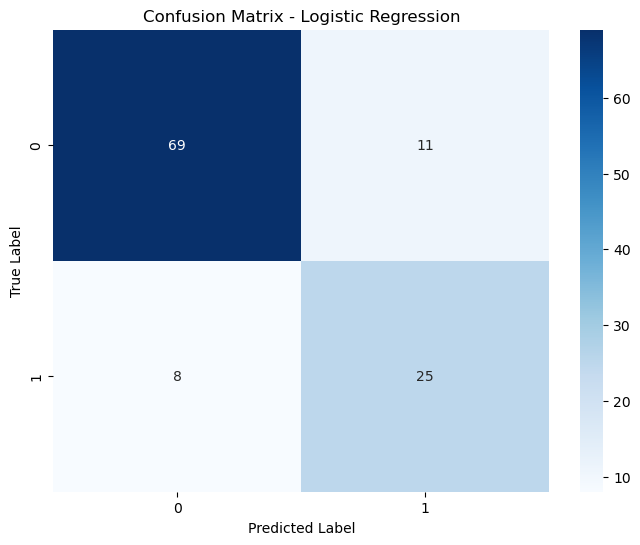

{'accuracy': 0.831858407079646,
 'precision': 0.6944444444444444,
 'recall': 0.7575757575757576,
 'f1': 0.7246376811594203,
 'confusion_matrix': array([[69, 11],
        [ 8, 25]], dtype=int64)}

In [29]:
model_results(y_test, y_pred_lr, model_name="Logistic Regression")

Notes: 
- Not bad for a first model
- It performs fairly well, with room to reduce precision/false positives while maintaining recall

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier(random_state=42)

In [32]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred_rf = rf.predict(X_test) 


Random Forest Results:
--------------------------------------------------
Accuracy: 0.7965
Precision: 0.6667
Recall: 0.6061
F1 Score: 0.6349


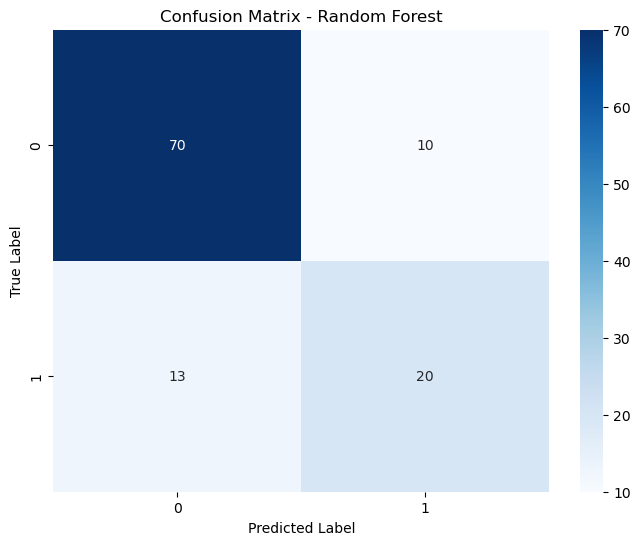

{'accuracy': 0.7964601769911505,
 'precision': 0.6666666666666666,
 'recall': 0.6060606060606061,
 'f1': 0.6349206349206349,
 'confusion_matrix': array([[70, 10],
        [13, 20]], dtype=int64)}

In [34]:
model_results(y_test, y_pred_rf, model_name="Random Forest")

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dt = DecisionTreeClassifier(random_state=42)

In [37]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
y_pred_dt = dt.predict(X_test) 


Decision Tree Results:
--------------------------------------------------
Accuracy: 0.7345
Precision: 0.5429
Recall: 0.5758
F1 Score: 0.5588


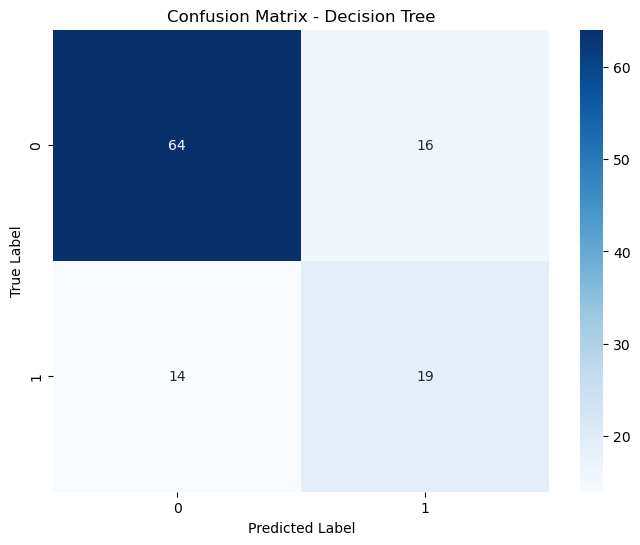

{'accuracy': 0.7345132743362832,
 'precision': 0.5428571428571428,
 'recall': 0.5757575757575758,
 'f1': 0.5588235294117646,
 'confusion_matrix': array([[64, 16],
        [14, 19]], dtype=int64)}

In [39]:
model_results(y_test, y_pred_dt, model_name="Decision Tree")

Notes:
- RF and Decision Tree is performing worse than Logistic Regression
- Let's try SVM and KNN to see if they can perform better than Logistic Regression

In [40]:
from sklearn.svm import SVC

In [41]:
svm = SVC(random_state=42)

In [42]:
svm.fit(X_train, y_train)

SVC(random_state=42)

In [43]:
y_pred_svc = svm.predict(X_test)


Support Vector Machine Results:
--------------------------------------------------
Accuracy: 0.8319
Precision: 0.6842
Recall: 0.7879
F1 Score: 0.7324


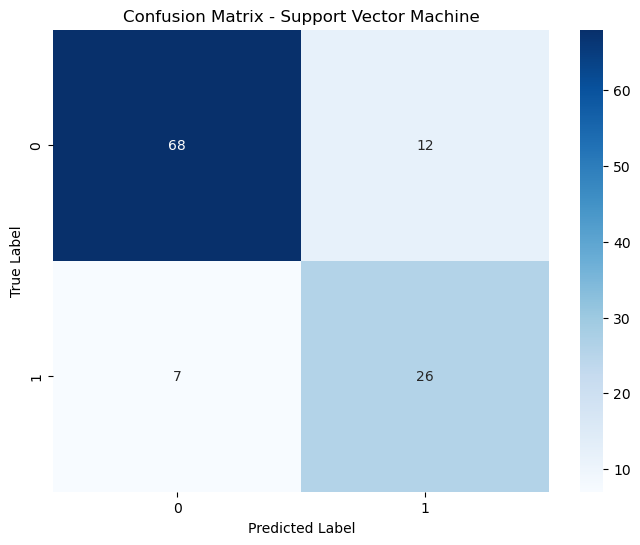

{'accuracy': 0.831858407079646,
 'precision': 0.6842105263157895,
 'recall': 0.7878787878787878,
 'f1': 0.732394366197183,
 'confusion_matrix': array([[68, 12],
        [ 7, 26]], dtype=int64)}

In [44]:
model_results(y_test, y_pred_svc, model_name="Support Vector Machine")

Notes:

- SVC is actually better than Logistic Regression in recall, f1 score, and fn.
- It is slightly better at catching true positives